<a href="https://colab.research.google.com/github/Electra89/Supervised_ML_Crop_Yield_Prediction/blob/main/Supervised_ML_Crop_Yield_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Supervised Machine Learning Crop Yield Prediction



##### **Project Type**    - Supervised Machine Learning
##### **Contribution**    - Individual
##### **Name**           -  Shreyas Mhatre


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

[Click here to open Github repo.](https://github.com/Electra89/Supervised_ML_Crop_Yield_Prediction)

# **Problem Statement**


> The science of training machines to learn and produce models for future predictions is widely used, and not for nothing. Agriculture plays a critical role in the global economy. With the continuing expansion of the human population understanding worldwide crop yield is central to addressing food security challenges and reducing the impacts of climate change.

> Crop yield prediction is an important agricultural problem. The Agricultural yield primarily depends on weather conditions (rain, temperature, etc), pesticides and accurate information about history of crop yield is an important thing for making decisions related to agricultural risk management and future predictions.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
## Data Maipulation Libraries
import numpy as np
import pandas as pd
import datetime as dt

## Data Visualisation Libraray
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px
import geopandas as gpd



#ML
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

### Dataset Loading

In [2]:
# Load Dataset
Dataset_path ="https://raw.githubusercontent.com/Electra89/Supervised_ML_Crop_Yield_Prediction/main/Crop_Yield_Dataset.csv"
df=pd.read_csv(Dataset_path)

### Dataset First View

In [3]:
# Dataset First Look
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
print(f"Number of Rows: {df.shape[0]} \nNumber of Columns: {df.shape[1]}")

Number of Rows: 28242 
Number of Columns: 8


### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
print(f"Duplicate Value Counts: {df.duplicated().sum()}")

Duplicate Value Counts: 0


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count

df.isnull().sum()

Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

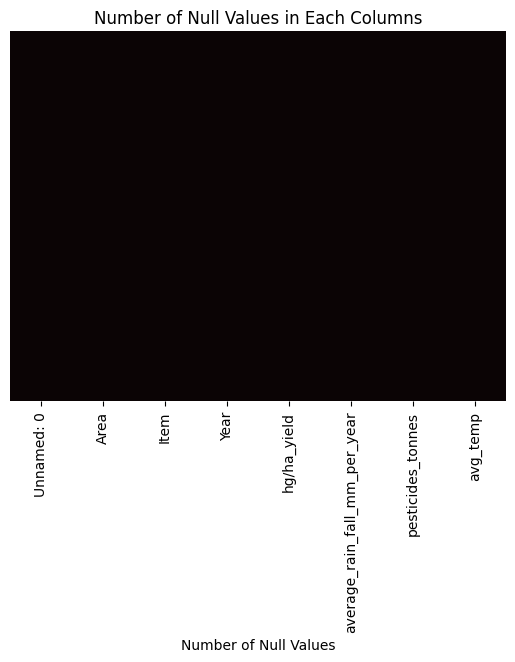

In [8]:
# Visualizing the missing values
null_counts = df.isnull().sum()

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='mako')
plt.title('Number of Null Values in Each Columns')
plt.xlabel('Number of Null Values')
plt.show()

### What did you know about your dataset?

> - Number of Entries: The dataset consists of 28242 entries, ranging from index 0 to 28241.
> - Columns: There are 8 columns in the dataset.
> - Data Types:
  - Most of the columns (6 out of 8) are of the int64 & float64 data type.
  - Only the Item and Area columns are of the object data type.
> - Missing Values: There doesn't appear to be any missing values in the dataset as each column has 28242 non-null entries.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df.columns

Index(['Unnamed: 0', 'Area', 'Item', 'Year', 'hg/ha_yield',
       'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp'],
      dtype='object')

In [10]:
# Dataset Describe

df.describe().transpose().style.background_gradient( cmap="icefire")

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,28242.000000,14120.500000,8152.907488,0.000000,7060.250000,14120.500000,21180.750000,28241.000000
Year,28242.000000,2001.544296,7.051905,1990.000000,1995.000000,2001.000000,2008.000000,2013.000000
hg/ha_yield,28242.000000,77053.332094,84956.612897,50.000000,19919.250000,38295.000000,104676.750000,501412.000000
average_rain_fall_mm_per_year,28242.000000,1149.055980,709.812150,51.000000,593.000000,1083.000000,1668.000000,3240.000000
pesticides_tonnes,28242.000000,37076.909344,59958.784665,0.040000,1702.000000,17529.440000,48687.880000,367778.000000
avg_temp,28242.000000,20.542627,6.312051,1.300000,16.702500,21.510000,26.000000,30.650000


### Variables Description

In [11]:
df.dtypes.value_counts()

int64      3
float64    3
object     2
dtype: int64

| Column         |              Description                                                           |
|----------------|-----------------------------------------------------------------------|
| **Area** |	Country names that plant crops
| **Item** | Types of crops planted
| **Year** |	Time of planted crops in years 1990-2013
| **average_rain_fall_mm_per_year** |	Average rain fall per year
| **pesticides_tonnes** |	Pesticides used in tonnes
| **avg_temp** |	Average temperature
| **hg/ha_yield** |	Crops yield production value in hectogram per hectare (Hg/Ha)

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
def unique_values(data_frame):
    for column in data_frame.columns:
        unique_values = data_frame[column].nunique()
        print(f"Column '{column}' has  unique value(s): {unique_values}")

# Call the function with your DataFrame
unique_values(df)

Column 'Unnamed: 0' has  unique value(s): 28242
Column 'Area' has  unique value(s): 101
Column 'Item' has  unique value(s): 10
Column 'Year' has  unique value(s): 23
Column 'hg/ha_yield' has  unique value(s): 11514
Column 'average_rain_fall_mm_per_year' has  unique value(s): 100
Column 'pesticides_tonnes' has  unique value(s): 1673
Column 'avg_temp' has  unique value(s): 1831


## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Shape of the dataframe before Data Wrangling
print(f"Dataset size before dropping values : {df.shape}")

Dataset size before dropping values : (28242, 8)


In [14]:
# As our dataset does not have any null values, but we have index column as it is not that important so we drop it
df.drop("Unnamed: 0", axis=1,inplace=True)


In [15]:
# remove countries with less than 100 record
country_counts =df['Area'].value_counts()
countries_to_drop = country_counts[country_counts < 100].index.tolist()
df_filtered = df[~df['Area'].isin(countries_to_drop)]
df = df_filtered.reset_index(drop=True)

In [16]:
# df.rename(columns = {'hg/ha_yield':'yield', 'average_rain_fall_mm_per_year':'avg_rain','pesticides_tonnes':'pesticide', 'Item':'Crop','Area':'Country'}, inplace = True)

In [16]:
# Shape of the dataframe after Data Wrangling
print(f"Dataset size after dropping  : {df.shape}")

Dataset size after dropping  : (26297, 7)


### What all manipulations have you done and insights you found?

> - **Dropping Unnamed Column**: If "Unnamed: 0" was not providing meaningful information, its removal simplifies the DataFrame and reduces unnecessary columns.

> - **Filtering Based on Counts**: By removing countries with less than 100 records, you might be focusing on more significant or frequently occurring data. This can help in dealing with noise or outliers.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1  Distribution Of Crop Yield

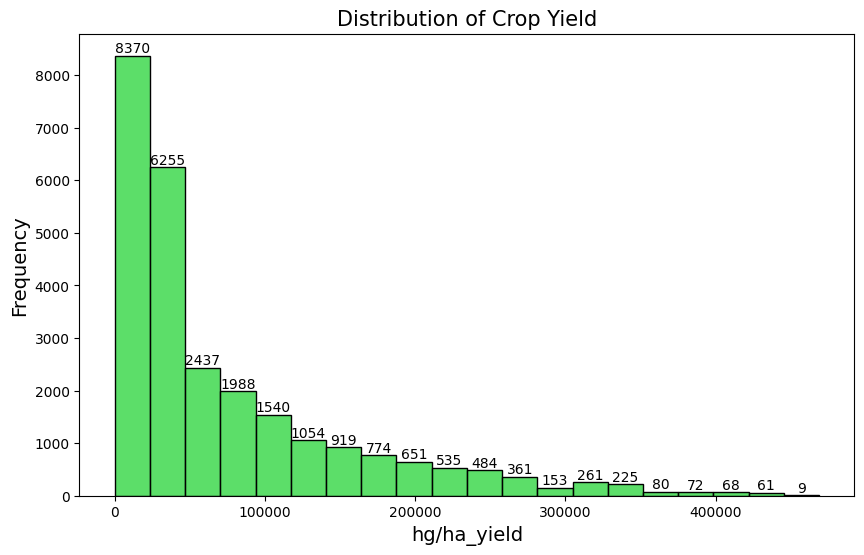

In [17]:
# Distribution Of Crop Yield Using Histogram

# Set the size of the figure
plt.figure(figsize=(10, 6))

# Plotting the histogram using Seaborn
sns.histplot(df['hg/ha_yield'], bins=20, color='#26d437', edgecolor='black')

# Adding a title to the plot
plt.title('Distribution of Crop Yield', fontsize=15)

# Adding labels for the x and y axes
plt.xlabel('hg/ha_yield', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Getting the counts for each bin
counts, bin_edges = np.histogram(df['hg/ha_yield'], bins=20)

# Displaying the counts for each bin
for count, bin_edge in zip(counts, bin_edges[:-1]):
    plt.text(bin_edge + (bin_edges[1] - bin_edges[0]) / 2, count, str(count),
             ha='center', va='bottom')

# Displaying the plot
plt.show()


##### 1. Why did you pick the specific chart?

> Histograms  is a suitable choice for visualizing the distribution of 'hg/ha_yield,' which is a continuous variable representing crop yield per hectare. The x-axis of the histogram represents the range of 'hg/ha_yield' values grouped into bins, while the y-axis shows the frequency or count of observations within each bin.

##### 2. What is/are the insight(s) found from the chart?

> - The majority of observations fall within the first few bins, with counts around **8370** and **6255**. This indicates that there is a common range of values for 'hg/ha_yield' that occur frequently.
> - There may be a few outliers on the right side of the distribution, as indicated by the lower counts in the last few bins (e.g., 23, 9). These bins may represent extreme values that are less common in the dataset

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

> - Understanding the most common range of 'hg/ha_yield' values (higher counts) can help businesses optimize their resources, focusing on areas or products that are more likely to yield positive outcomes.

#### Chart - 2 Distribution of Crop Types

<ipython-input-18-e38ad9ce83a2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Item', data=df, palette='autumn')


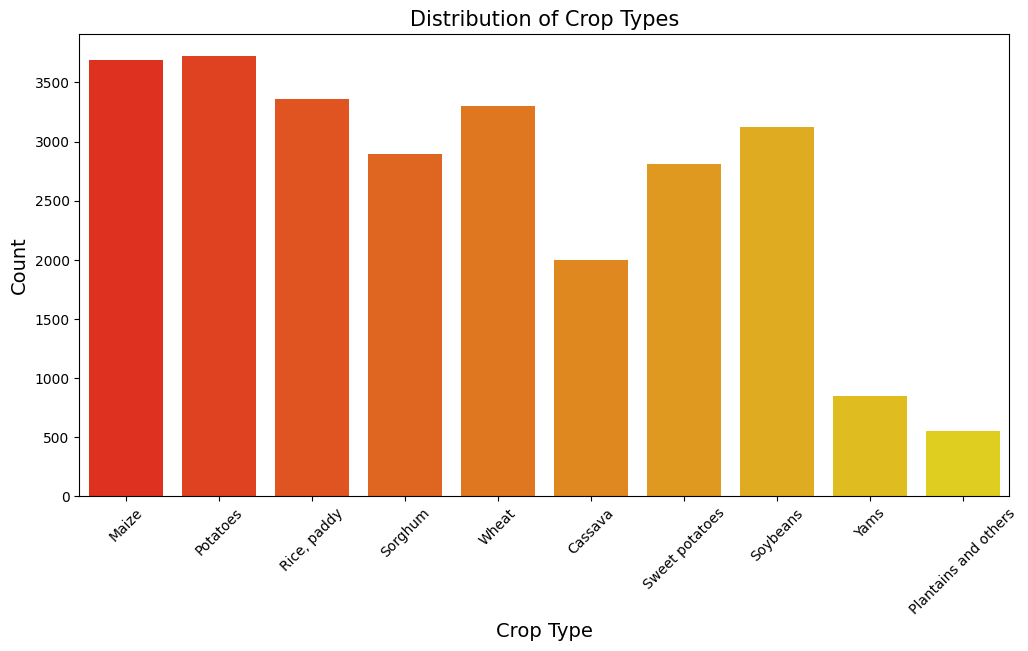

In [18]:
# Distribution of Crop Types Using Seaborn Bar Plot

# Set the size of the figure
plt.figure(figsize=(12, 6))

# Creating a Seaborn bar plot for the distribution of crop types
sns.countplot(x='Item', data=df, palette='autumn')

# Adding a title to the plot
plt.title('Distribution of Crop Types', fontsize=15)

# Adding labels for the x and y axes
plt.xlabel('Crop Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

##### 1. Why did you pick the specific chart?

> the bar plot is a suitable choice for visualizing because it aligns well with the categorical nature of the data and facilitates a clear comparison of crop types based on their counts. It's an effective and commonly used visualization for such distributions.

##### 2. What is/are the insight(s) found from the chart?

> - Potatoes, Maize, and Wheat are the most frequently occurring crops in the dataset, as they have the highest counts. These crops seem to dominate in terms of cultivation or observation.
> - Yams, Plantains, and others have lower counts, indicating that these crops are less commonly observed or cultivated compared to others in the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

> - By understanding the most common crops (e.g., Potatoes, Maize, Wheat), businesses can optimize their resources, focusing on the cultivation, production, or marketing of these high-demand crops.
> - Identifying less common crops (e.g., Yams, Plantains) may present opportunities for diversification. Exploring these less common crops could tap into niche markets or cater to specific consumer preferences.

#### Chart - 3  How crop production changed in years

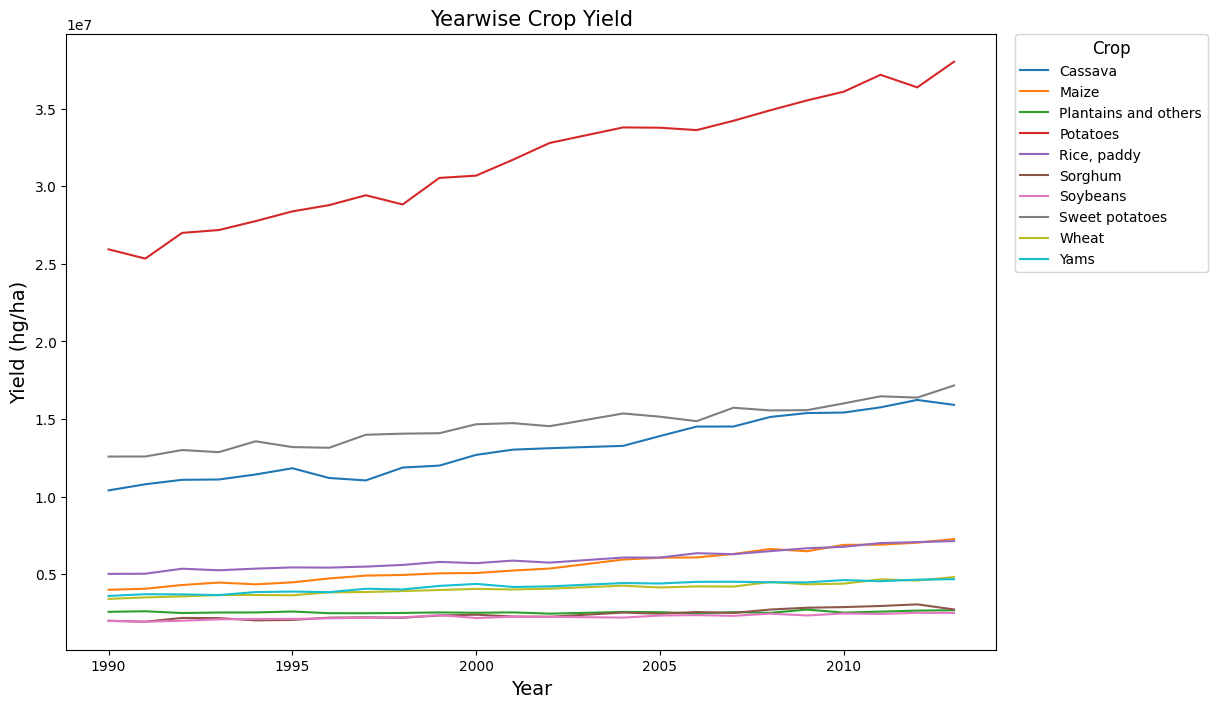

In [19]:

# Creating dataframe for crops, yield according to year
df2 = df.groupby(['Item', 'Year'])['hg/ha_yield'].sum().reset_index()

# Setting the size of the figure
plt.figure(figsize=(12, 8))

# Plotting the data using Seaborn lineplot
sns.lineplot(data=df2, x='Year', y='hg/ha_yield', hue='Item')

# Adding a title to the plot
plt.title('Yearwise Crop Yield', fontsize=15)

# Adding labels for the x and y axes
plt.xlabel('Year', fontsize=14)
plt.ylabel('Yield (hg/ha)', fontsize=14)

# Displaying the legend
plt.legend(title='Crop', title_fontsize='12',bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


# Displaying the plot
plt.show()


##### 1. Why did you pick the specific chart?

> The line chart is suitable for visualizing because Line plots are effective for displaying trends over time. In this case, the x-axis represents the years, and the y-axis represents the crop yield. The lines connecting data points provide a clear visual representation of how the crop yield changes across different years.

##### 2. What is/are the insight(s) found from the chart?

> -  Over the years 1990 to 2010, the yield of Sweet Potatoes shows a consistent increasing trend. The values steadily rise from 1990 to 2010, indicating a positive and continuous growth in Sweet Potatoes production.
> - Cassava and Potatoes are consistently high-yielding crops throughout the observed years. Potatoes, in particular, has a substantial yield, reaching  (2010). These crops have maintained their dominance in production over the entire period.
> -  The yield of Rice, Paddy demonstrates steady growth over the years. The values gradually increase in 1990 to 2010 , indicating a positive trend in Rice production.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

> - Fluctuations in the yield of Maize and Wheat can be a concern for businesses relying heavily on these crops. Sudden changes in production may be influenced by factors like weather conditions or market demand, leading to potential challenges in planning.
> - The slight variability in Plantains and others without a clear upward trend might indicate a potential stagnation in production. Businesses may need to assess market demand and explore strategies to stimulate growth in this category.

#### Chart - 4 Crops Yield per Hectare by Country

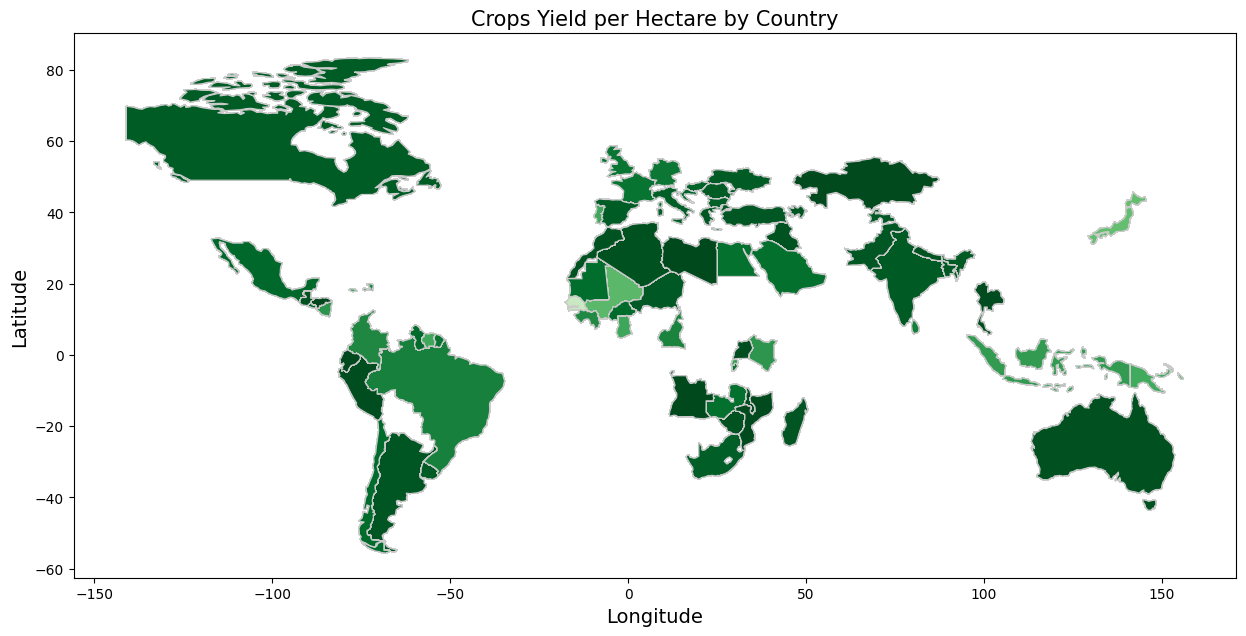

In [20]:

# GeoJSON URL for country boundaries
geojson_url = "https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson"

# Read GeoJSON data into a GeoDataFrame
world_map = gpd.read_file(geojson_url)
merged_data = world_map.merge(df, left_on='NAME', right_on='Area', how='left')

# Plotting
fig, ax = plt.subplots(figsize=(15, 10))

# Use 'hg/ha_yield' column for coloring the map
merged_data.plot(column='hg/ha_yield', cmap='Greens_r', linewidth=0.8, edgecolor='0.8', ax=ax)

# Adding a title to the plot
ax.set_title("Crops Yield per Hectare by Country", fontsize=15)

# Adding labels for the x and y axes
ax.set_xlabel("Longitude", fontsize=14)
ax.set_ylabel("Latitude", fontsize=14)

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

> The data involves country-specific information, and a choropleth map is an effective way to visualize geospatial data. Each country is represented on the map, allowing for a quick and intuitive understanding of the distribution of the variable of interest (in this case, 'hg/ha_yield') across different regions.

##### 2. What is/are the insight(s) found from the chart?

> The map allows you to visually assess how the crop yield per hectare varies across different countries. Darker shades of green may indicate higher yields, while lighter shades may represent lower yields.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

> Businesses in the agricultural sector may identify regions with untapped potential for crop production. This insight could guide decisions related to market expansion, introducing new products, or forming strategic partnerships.

#### Chart - 5

<ipython-input-22-23203fb607a1>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hg/ha_yield', y='Area', data=df_c, palette="rocket")


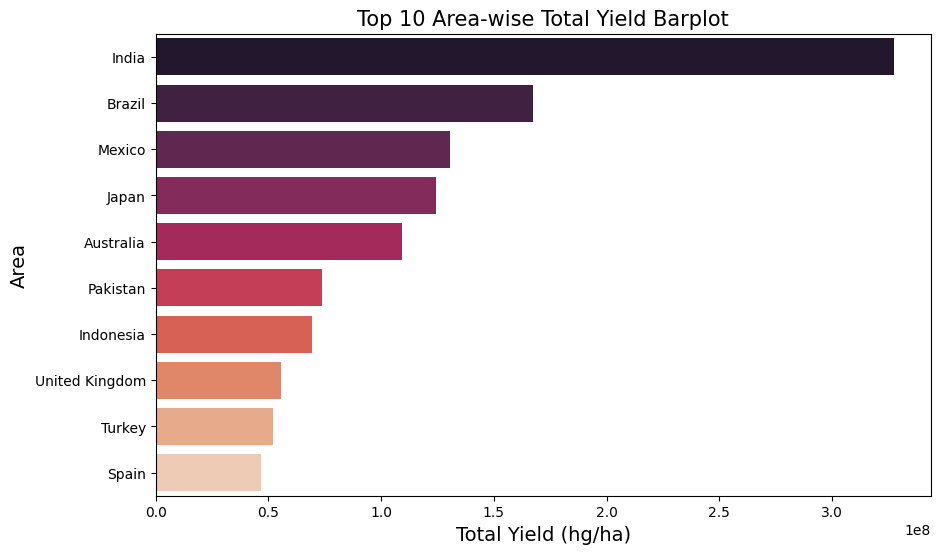

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Group by 'Area' and calculate the total yield, then select the top 10
df_c = df.groupby(['Area'])['hg/ha_yield'].sum().nlargest(10).reset_index(name='hg/ha_yield')

# Create a horizontal bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='hg/ha_yield', y='Area', data=df_c, palette="rocket")

# Adding a title to the plot
plt.title("Top 10 Area-wise Total Yield Barplot", fontsize=15)

# Adding labels for the x and y axes
plt.xlabel("Total Yield (hg/ha)", fontsize=14)
plt.ylabel("Area", fontsize=14)

# Display the plot
plt.show()


##### 1. Why did you pick the specific chart?

>  A horizontal bar plot is suitable for visualizing for comparing the magnitudes of different categories, in this case, the total yield of different areas. The length of the bars directly represents the values, making it easy to compare the yields of different areas.

##### 2. What is/are the insight(s) found from the chart?

> - India stands out as the area with the highest total crop yield among the top 10. It significantly surpasses other areas in terms of agricultural productivity.
> - The top 10 areas contributing to the highest crop yields include a diverse set of countries or regions, including Asian, South American, and European areas. This diversity highlights the global distribution of agricultural productivity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

> Understanding the diversity of high-yield areas can provide opportunities for market diversification. Businesses can explore multiple regions to reduce dependence on a single market and mitigate risks associated with specific environmental or economic conditions.

#### Chart - 6 Temperature vs. Crop Yield (Top 10 Countries)

In [40]:
df_top_10.groupby('Area')['avg_temp'].mean().sort_values(ascending=False).reset_index()


,Area,avg_temp
0,Indonesia,26.931087
1,India,26.012589
2,Pakistan,24.394976
3,Brazil,22.673913
4,Mexico,20.421576
5,Australia,16.593696
6,Spain,15.608986
7,Turkey,15.122864
8,Japan,14.967391
9,United Kingdom,9.602783


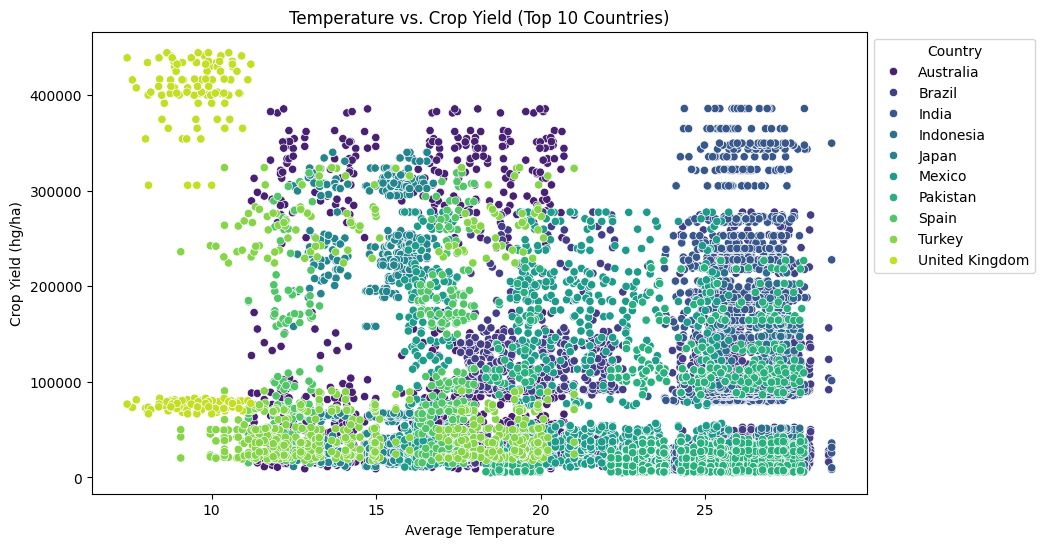

In [37]:
# Select the top 10 countries based on total crop yield
top_10_countries = df.groupby('Area')['hg/ha_yield'].sum().nlargest(10).index

# Filter the DataFrame for the top 10 countries
df_top_10 = df[df['Area'].isin(top_10_countries)]

# Plotting the scatter plot for the top 10 countries
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_temp', y='hg/ha_yield', data=df_top_10, hue='Area', palette='viridis')
plt.title('Temperature vs. Crop Yield (Top 10 Countries)')
plt.xlabel('Average Temperature')
plt.ylabel('Crop Yield (hg/ha)')
plt.legend(title='Country', bbox_to_anchor=(1, 1), loc='upper left')  # Add legend outside the plot for better visibility
plt.show()


##### 1. Why did you pick the specific chart?

> A scatter plot is well-suited for exploring relationships between two continuous variables, in this case, 'avg_temp' (average temperature) and 'hg/ha_yield' (crop yield). It allows for the examination of patterns, trends, and potential correlations between these variables.

##### 2. What is/are the insight(s) found from the chart?

> - Higher temperatures, such as those seen in Indonesia and India, may be associated with higher crop yields.
> - Lower temperatures, observed in countries like the United Kingdom and Japan, may be associated with lower crop yields.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

> Understanding the temperature conditions associated with high crop yields allows businesses to explore new markets with similar climates. This can lead to market expansion and diversification, tapping into regions conducive to specific crops.

In [26]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [27]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [28]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [29]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

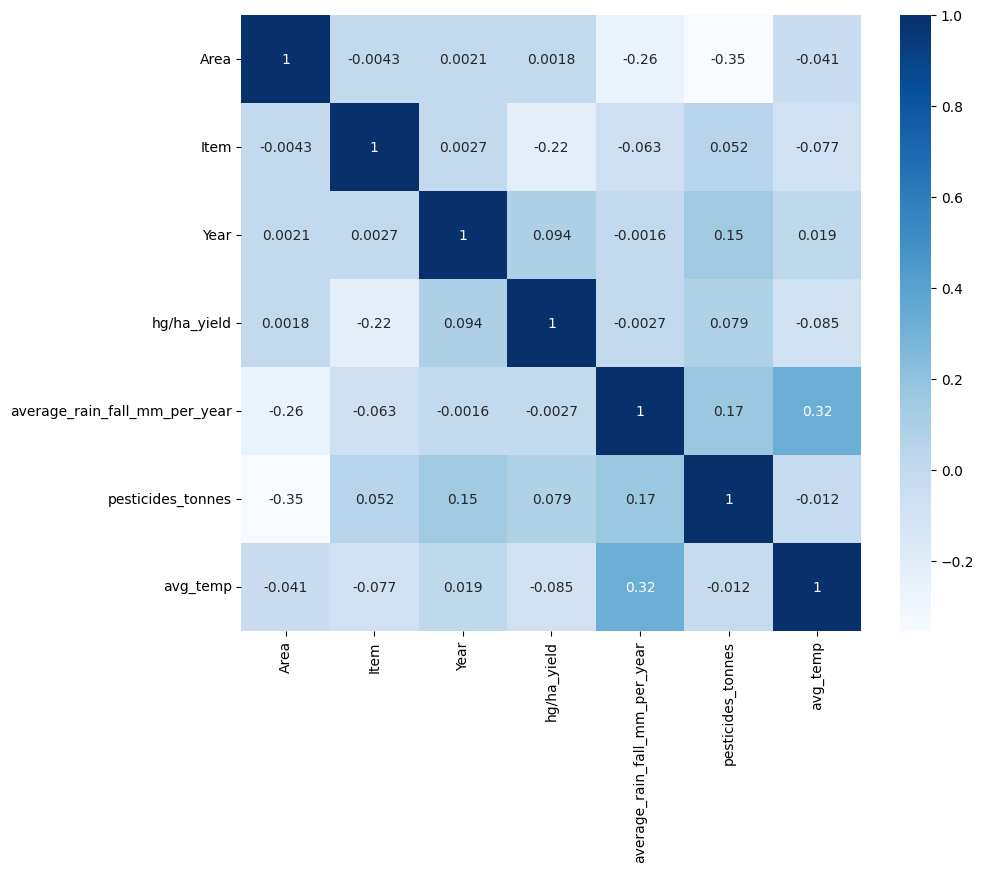

In [48]:
# Creating a Heatmap to visualize the Correlation data
plt.figure(figsize=(10,8))
heatmap=sns.heatmap(dft.corr() ,cbar=True,annot=True, cmap="Blues")

# Displaying the plot
plt.show()

##### 1. Why did you pick the specific chart?

> A correlation matrix is a table type graph which indicates the results of correlation coefficients tests between variables at a time. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The fluctuation of correlation is lies between -1 to 1.

##### 2. What is/are the insight(s) found from the chart?

> The correlation coefficient of approximately -0.26 suggests a weak negative correlation between the "average rainfall per year" and "crop yield per hectare". This implies that, on average, as rainfall increases, there is a slight tendency for crop yield to decrease

#### Chart - 15 - Pair Plot

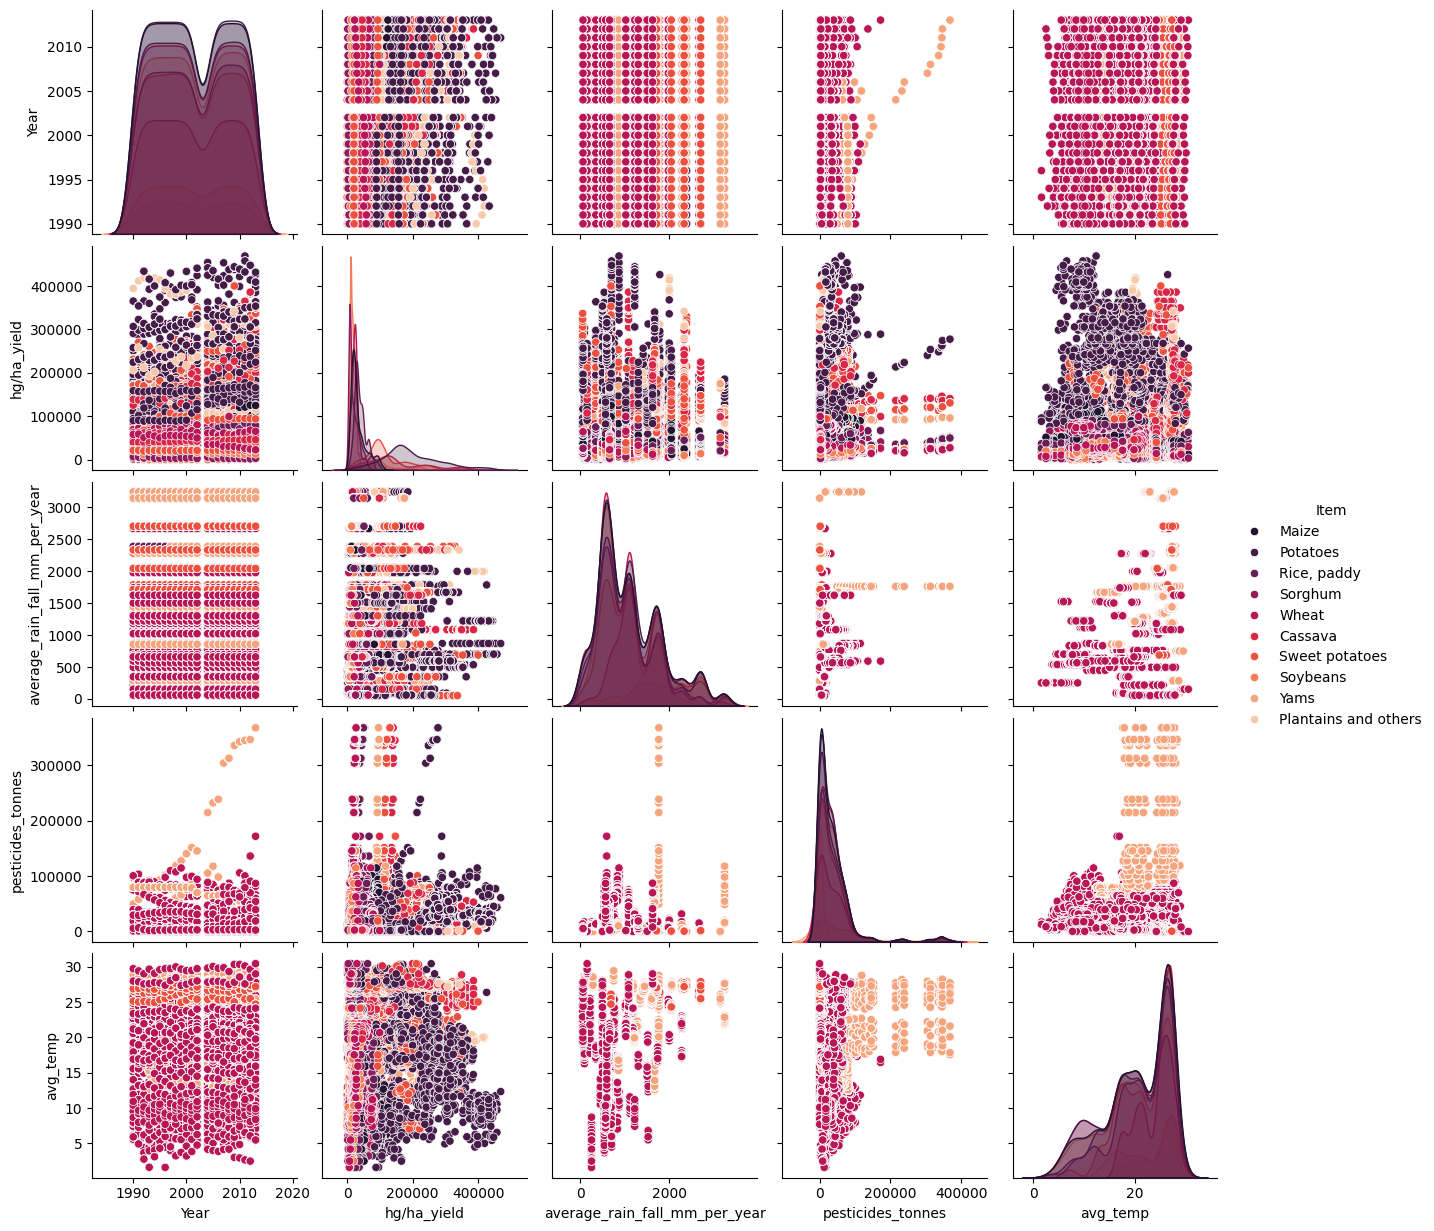

In [26]:
# Pair Plot visualization

# Creating a line plot to visualize the  relationships between different variables in the Crop Yield dataset
sns.pairplot(df, palette = 'rocket',hue='Item')

# Displaying the plot
plt.show()


##### 1. Why did you pick the specific chart?

> Pair plot is used to visualizes the given data to find the relationship between them where the variables can be continuous or categorical. Pair Plot provides a high-level interface for drawing attractive and informative statistical graphics.

##### 2. What is/are the insight(s) found from the chart?

> We can see the interactions between different variables, we found strong correlations and dependencies among them. These relationships provided valuable insights into how changes in one variable corresponded with changes in others.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

> Hypothetical Statement 1:
> * **Null Hypothesis**: There is no significant difference in crop yields between the years 2000 and 2010.
> * **Alternative Hypothesis**: There is a significant difference in crop yields between the years 2000 and 2010.

> Hypothetical Statement 2:
> * **Null Hypothesis**: The average crop yield is the same across different countries in the dataset.
> * **Alternative Hypothesis**: There is a significant difference in average crop yield among different countries in the dataset.

> Hypothetical Statement 3:
> * **Null Hypothesis**: There is no significant correlation between the average temperature and crop yield in the dataset.
> * **Alternative Hypothesis**: There is a significant correlation between the average temperature and crop yield in the dataset.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

> * **Null Hypothesis**: There is no significant difference in crop yields between the years 2000 and 2010.
> * **Alternative Hypothesis**: There is a significant difference in crop yields between the years 2000 and 2010.


#### 2. Perform an appropriate statistical test.

In [106]:
from scipy.stats import ttest_ind

# Create separate dataframes for crop yields in the years 2000 and 2010
crop_yield_2000 = df[df['Year'] == 2000]['hg/ha_yield']
crop_yield_2010 = df[df['Year'] == 2010]['hg/ha_yield']

# Perform two-sample t-test
t, p = ttest_ind(crop_yield_2000, crop_yield_2010, equal_var=False)

# Print the results
print('t-value:', t)
print('p-value:', p)

# Set the significance level
alpha = 0.05

# Print the interpretation of the results
if p < alpha:
    print("Reject the null hypothesis. There is a significant difference in crop yields between 2000 and 2010.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in crop yields between 2000 and 2010.")


t-value: -3.137200841227543
p-value: 0.0017275861356435668
Reject the null hypothesis. There is a significant difference in crop yields between 2000 and 2010.


##### Which statistical test have you done to obtain P-Value?

> The statistical test used to obtain the P-Value is a two-sample t-test.

##### Why did you choose the specific statistical test?

> This test is used to compare the means of two independent samples (crop yields in the years 2000 and 2010) to determine if there is a significant difference.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

> * **Null Hypothesis**: The average crop yield is the same across different countries in the dataset.
> * **Alternative Hypothesis**: There is a significant difference in average crop yield among different countries in the dataset.

#### 2. Perform an appropriate statistical test.

In [107]:
from scipy.stats import f_oneway

areas = df['Area'].unique()
crop_yield_by_area = [df[df['Area'] == area]['hg/ha_yield'] for area in areas]

# Perform one-way ANOVA test
f_stat, p = f_oneway(*crop_yield_by_area)

# Print the results
print('F-statistic:', f_stat)
print('p-value:', p)

# Set the significance level
alpha = 0.05

# Print the interpretation of the results
if p < alpha:
    print("Reject the null hypothesis. There is a significant difference in average crop yield among different areas.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in average crop yield among different areas.")


F-statistic: 53.175007550731976
p-value: 0.0
Reject the null hypothesis. There is a significant difference in average crop yield among different areas.


##### Which statistical test have you done to obtain P-Value?

> The statistical test used to obtain the P-Value is a One-way ANOVA test

##### Why did you choose the specific statistical test?

> This test is used to compare the means of three or more independent groups (crop yields in different areas) to determine if there is a significant difference.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

> * **Null Hypothesis**: There is no significant correlation between the average temperature and crop yield in the dataset.
> * **Alternative Hypothesis**: There is a significant correlation between the average temperature and crop yield in the dataset.

#### 2. Perform an appropriate statistical test.

In [108]:
from scipy.stats import pearsonr

# Extract relevant columns from the dataset
temperature = df['avg_temp']
crop_yield = df['hg/ha_yield']

# Perform Pearson correlation test
corr, p_value = pearsonr(temperature, crop_yield)

# Print the results
print('Pearson correlation coefficient:', corr)
print('p-value:', p_value)

# Set the significance level
alpha = 0.05

# Print the interpretation of the results
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant correlation between average temperature and crop yield.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between average temperature and crop yield.")


Pearson correlation coefficient: -0.08468347817542057
p-value: 4.646796400329042e-43
Reject the null hypothesis. There is a significant correlation between average temperature and crop yield.


##### Which statistical test have you done to obtain P-Value?

> The statistical test used to obtain the P-Value is a Pearson correlation test

##### Why did you choose the specific statistical test?

> This test is used to assess the strength and direction of a linear relationship between two continuous variables (average temperature and crop yield).

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [109]:
df.isna().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

 Let's move ahead, as our dataet doe not contain any null values.

#### What all missing value imputation techniques have you used and why did you use those techniques?

> There are no missing values to handle in the given dataset.

### 2. Handling Outliers

In [110]:
#@markdown # Outlier detector
def Outlier_detector(data, feature, figsize=(10, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram


In [111]:
# Defining  empty lists for different Datatypes
numeric_columns = []
# Seprating columns and categorize based on data type
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:
      numeric_columns.append(column)

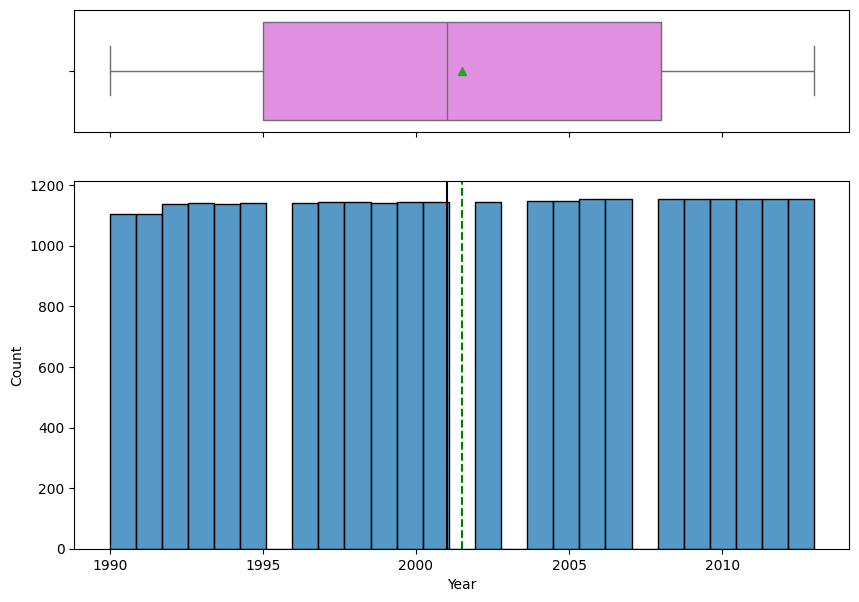

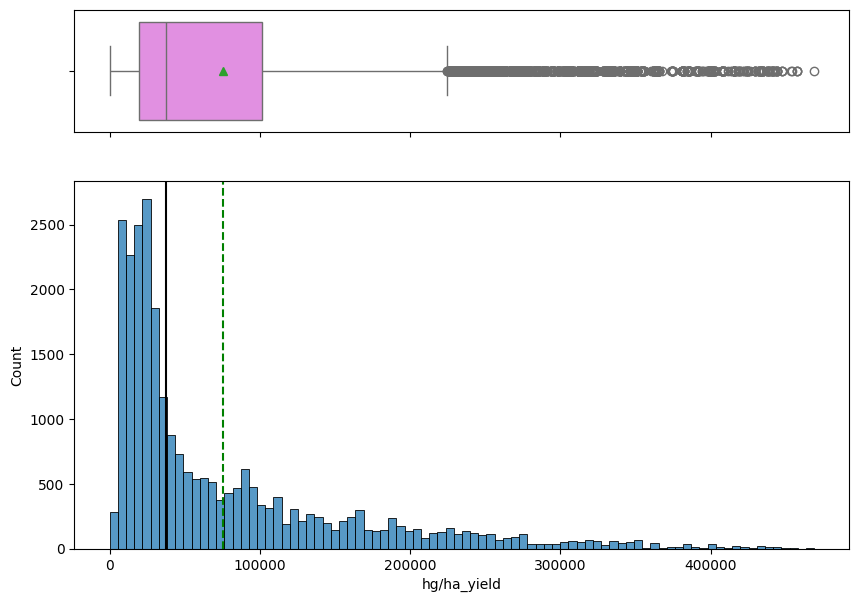

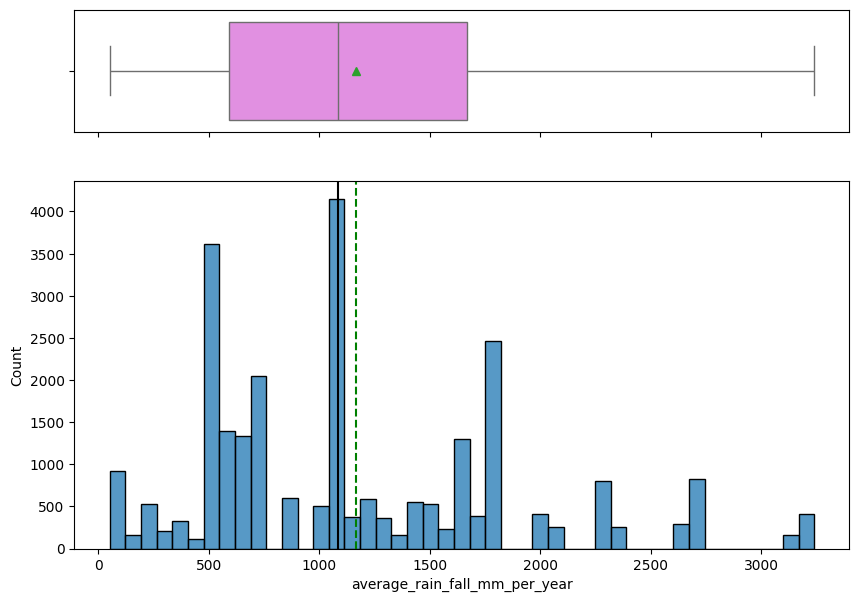

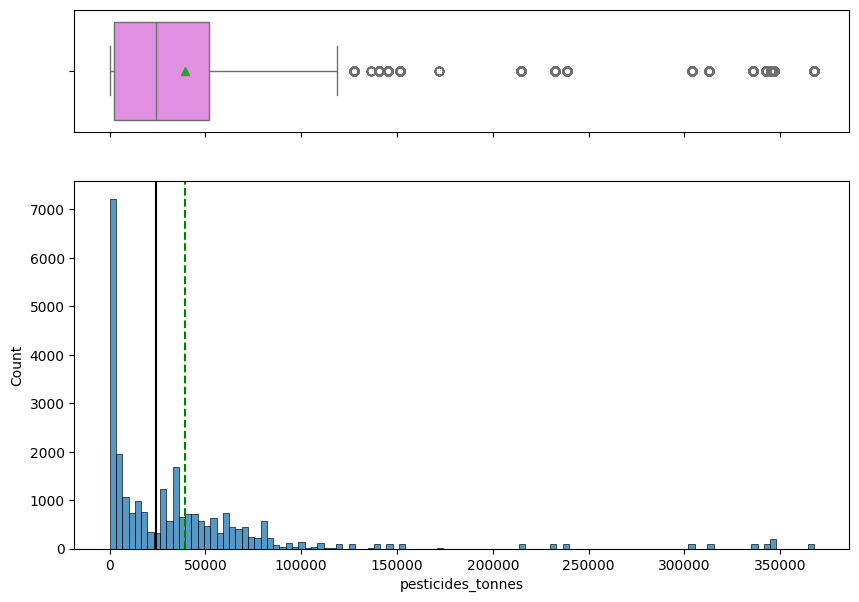

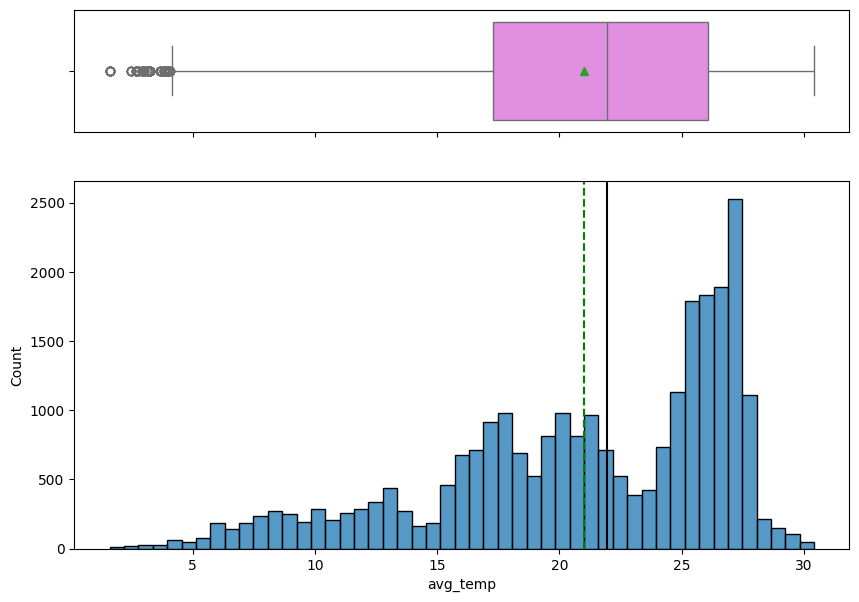

In [112]:
for variable in numeric_columns:
  Outlier_detector(df,variable)

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

In [ ]:
# Encode your categorical columns

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [113]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Algeria,Maize,1990,16500,89.0,1828.92,17.48
1,Algeria,Potatoes,1990,78936,89.0,1828.92,17.48
2,Algeria,"Rice, paddy",1990,28000,89.0,1828.92,17.48
3,Algeria,Sorghum,1990,16571,89.0,1828.92,17.48
4,Algeria,Wheat,1990,6315,89.0,1828.92,17.48


## Data Preprocessing

### 6. Data Scaling

In [27]:
dft=df.copy()

### Encoding Categorical Variables

In [28]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = dft.select_dtypes(include=['object']).columns.tolist()
label_encoder = LabelEncoder()
for column in categorical_columns:
    dft[column] = label_encoder.fit_transform(dft[column])

##### Which method have you used to scale you data and why?

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

## ***7. ML Model Implementation***

In [116]:
X, y = dft.drop(labels='hg/ha_yield', axis=1), dft['hg/ha_yield']

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [64]:
# mmc = MinMaxScaler()
# X_train = mmc.fit_transform(X_train)
# X_test = mmc.transform(X_test)

In [119]:
lr = LinearRegression()

In [120]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = lr.score(X_test, y_test)
print(y_pred,"--/n",accuracy)

[88510.1269348  41671.68558874 60650.66415672 ... 68761.26947892
 75501.47128898 50862.44324078] --/n 0.07372439385854623


In [121]:
acc = (lr.score(X_train , y_train)*100)
print(f'The accuracy of the {name} Model Train is {acc:.2f}')

The accuracy of the Bagging Regressor Model Train is 7.39


In [137]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boost', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3,random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42)),
    ('KNN',KNeighborsRegressor(n_neighbors=5)),
    ('Decision Tree',DecisionTreeRegressor(random_state=42)),
    ('Bagging Regressor',BaggingRegressor(n_estimators=150, random_state=42))
          ]

The accuracy of the Linear Regression Model Train is 7.39
The accuracy of the Linear Regression Model Test is 7.37
Mean Squared Error for Linear Regression: 6293718529.871188
R2 Score for Linear Regression: 0.07372439385854623


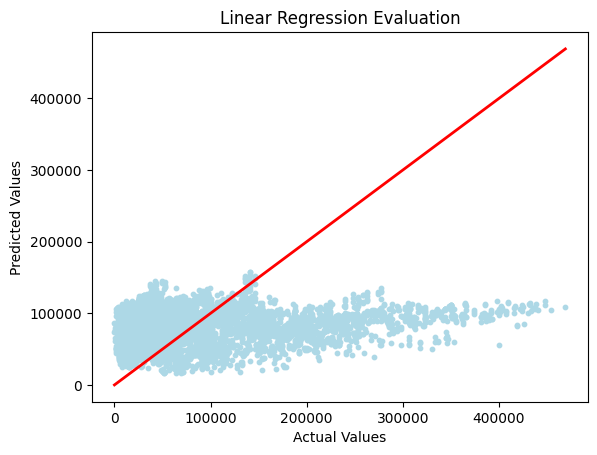

The accuracy of the Random Forest Model Train is 99.80
The accuracy of the Random Forest Model Test is 98.56
Mean Squared Error for Random Forest: 97654323.57322498
R2 Score for Random Forest: 0.985627762453817


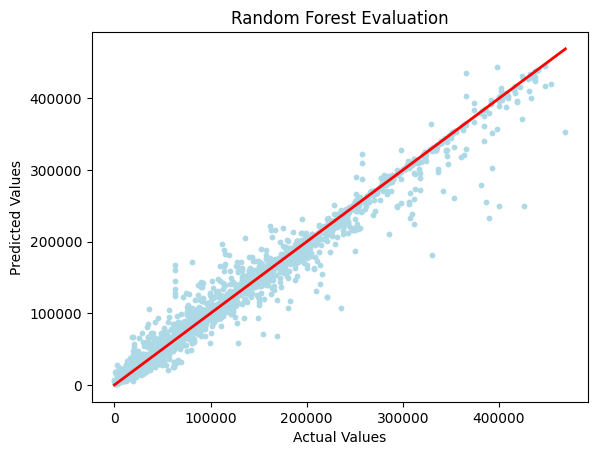

The accuracy of the Gradient Boost Model Train is 84.47
The accuracy of the Gradient Boost Model Test is 83.11
Mean Squared Error for Gradient Boost: 1147345777.2581482
R2 Score for Gradient Boost: 0.831139826123527


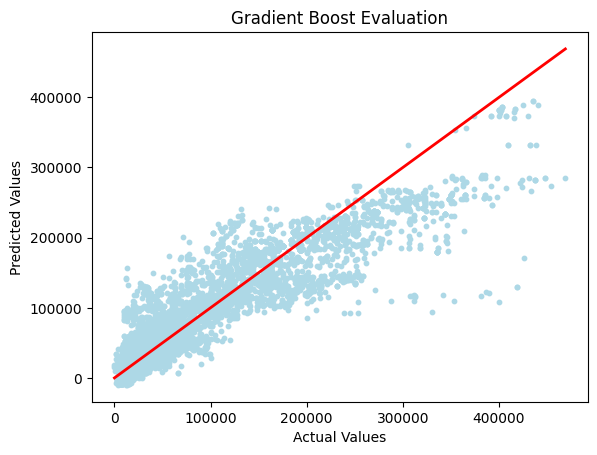

The accuracy of the XGBoost Model Train is 98.82
The accuracy of the XGBoost Model Test is 97.43
Mean Squared Error for XGBoost: 174504250.3200925
R2 Score for XGBoost: 0.9743174040160306


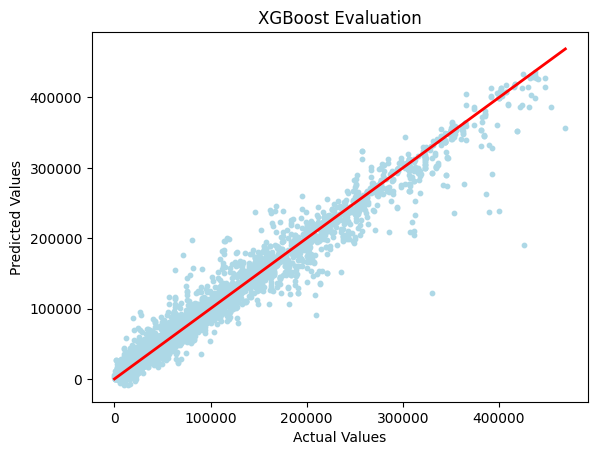

The accuracy of the KNN Model Train is 56.72
The accuracy of the KNN Model Test is 28.82
Mean Squared Error for KNN: 4836388296.236208
R2 Score for KNN: 0.2882064109843002


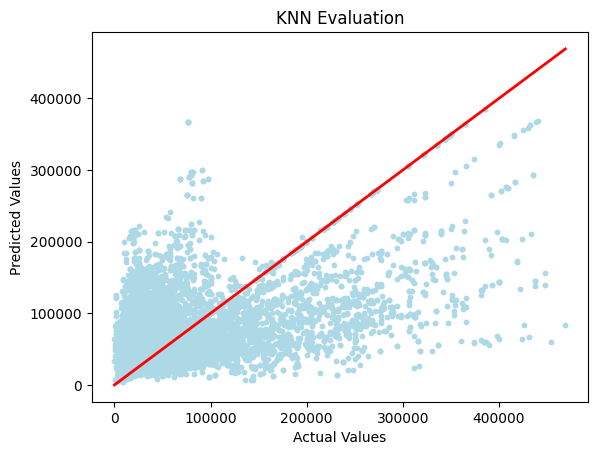

The accuracy of the Decision Tree Model Train is 100.00
The accuracy of the Decision Tree Model Test is 97.62
Mean Squared Error for Decision Tree: 161890347.54372624
R2 Score for Decision Tree: 0.9761738503099876


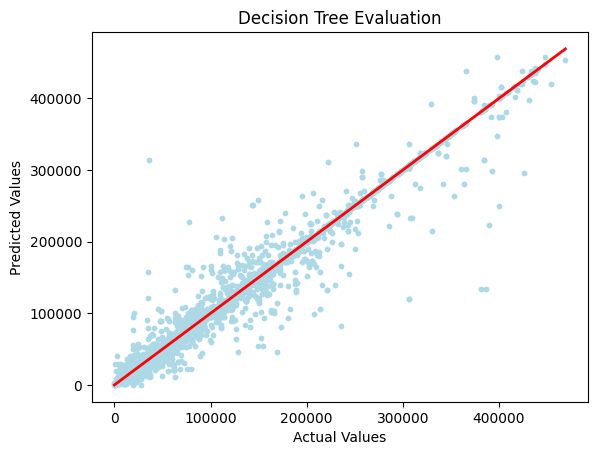

The accuracy of the Bagging Regressor Model Train is 99.81
The accuracy of the Bagging Regressor Model Test is 98.59
Mean Squared Error for Bagging Regressor: 95933983.56564394
R2 Score for Bagging Regressor: 0.9858809528333562


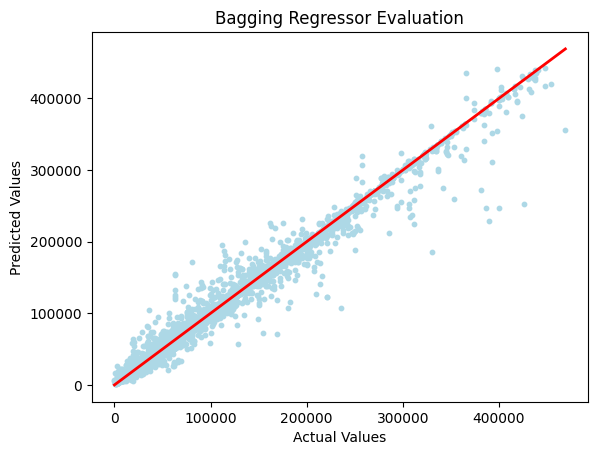

In [149]:
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy, mean squared error, and R2 score
    accuracy_train = model.score(X_train, y_train) * 100
    accuracy_test = model.score(X_test, y_test) * 100
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Display accuracy and evaluation metrics
    print(f"The accuracy of the {name} Model Train is {accuracy_train:.2f}")
    print(f"The accuracy of the {name} Model Test is {accuracy_test:.2f}")
    print(f"Mean Squared Error for {name}: {mse}")
    print(f"R2 Score for {name}: {r2}")

    # Plotting actual vs predicted values
    plt.scatter(y_test, y_pred, s=10, color='lightblue')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linewidth=2)
    plt.title(f'{name} Evaluation')
    plt.show()

# Now you can use this function in your loop
results = []

for name, model in models:
    evaluate_model(name, model, X_train, y_train, X_test, y_test)

    # Append results to the list
    results.append((name, model.score(X_test, y_test), mean_squared_error(y_test, model.predict(X_test)), r2_score(y_test, model.predict(X_test))))


In [150]:
dff = pd.DataFrame(results, columns=['Model', 'Accuracy', 'MSE', 'R2_score'])
df_styled_best = dff.style.highlight_max(subset=['Accuracy','R2_score'], color='green').highlight_min(subset=['MSE'], color='green').highlight_max(subset=['MSE'], color='red').highlight_min(subset=['Accuracy','R2_score'], color='red')

display(df_styled_best)

,Model,Accuracy,MSE,R2_score
0,Linear Regression,0.073724,6293718529.871188,0.073724
1,Random Forest,0.985628,97654323.573225,0.985628
2,Gradient Boost,0.831140,1147345777.258148,0.831140
3,XGBoost,0.974317,174504250.320092,0.974317
4,KNN,0.288206,4836388296.236208,0.288206
5,Decision Tree,0.976174,161890347.543726,0.976174
6,Bagging Regressor,0.985881,95933983.565644,0.985881


In [152]:
!pip install tabulate


In [159]:
results = []

# Define a function to calculate mean absolute percentage error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Evaluate models
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = model.score(X_test, y_test)
    MSE = mean_squared_error(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    R2_score = r2_score(y_test, y_pred)
    MAPE = mean_absolute_percentage_error(y_test, y_pred)

    # K-fold cross-validation
    num_folds = 5
    kf = KFold(n_splits=num_folds, shuffle=True)
    scores = cross_val_score(model, X, y, cv=kf)

    # Display results in tabular form
    k_fold_results = {'Model': [name] * num_folds, 'Fold': list(range(1, num_folds + 1)), 'Score': scores}
    print(tabulate(k_fold_results, headers='keys', tablefmt='grid'))
    print('-' * 30)

    results.append((name, accuracy, MSE, MAE, MAPE, R2_score))


+-------------------+--------+-----------+
| Model             |   Fold |     Score |
+===================+========+===========+
| Linear Regression |      1 | 0.0714308 |
+-------------------+--------+-----------+
| Linear Regression |      2 | 0.076565  |
+-------------------+--------+-----------+
| Linear Regression |      3 | 0.0710952 |
+-------------------+--------+-----------+
| Linear Regression |      4 | 0.0750436 |
+-------------------+--------+-----------+
| Linear Regression |      5 | 0.0723429 |
+-------------------+--------+-----------+
------------------------------
+---------------+--------+----------+
| Model         |   Fold |    Score |
+===============+========+==========+
| Random Forest |      1 | 0.983836 |
+---------------+--------+----------+
| Random Forest |      2 | 0.990274 |
+---------------+--------+----------+
| Random Forest |      3 | 0.988419 |
+---------------+--------+----------+
| Random Forest |      4 | 0.990172 |
+---------------+--------+----

In [167]:
dfl = pd.DataFrame(results, columns=['Model', 'Accuracy', 'MSE', 'MAE', 'MAPE', 'R2_score'])
df_styled_best = dfl.style.highlight_max(subset=['Accuracy','R2_score'], color='green').highlight_min(subset=['MSE','MAE','MAPE'], color='green').highlight_max(subset=['MSE','MAE','MAPE'], color='red').highlight_min(subset=['Accuracy','R2_score'], color='red')

display(df_styled_best)

,Model,Accuracy,MSE,MAE,MAPE,R2_score
0,Linear Regression,0.073724,6293718529.871188,60955.317749,241.953648,0.073724
1,Random Forest,0.985628,97654323.573225,3480.841065,10.257063,0.985628
2,Gradient Boost,0.831140,1147345777.258148,21184.660834,59.678365,0.831140
3,XGBoost,0.974317,174504250.320092,7073.086563,19.837815,0.974317
4,KNN,0.288206,4836388296.236208,47716.358935,163.118643,0.288206
5,Decision Tree,0.976174,161890347.543726,3559.269202,9.610095,0.976174
6,Bagging Regressor,0.985881,95933983.565644,3450.508398,10.119939,0.985881


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***